# Team 13 Capstone - EDA (Employment and Income Data)
## Author: Millie O Symns 
## Date: 1/6/21

This notebook provides some details on the process of exploring the census data related to the digital divide project. 

#### Packages Import

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Employment Data

In [2]:
with open('clean_employment_data.csv') as f:
    raw_clean_employment =  pd.read_csv(f, delimiter=',')
    
raw_clean_employment

,GEO_ID,S2301_C01_001E,S2301_C01_001M,S2301_C01_002E,S2301_C01_002M,S2301_C01_003E,S2301_C01_003M,S2301_C01_004E,S2301_C01_004M,S2301_C01_005E,...,S2301_C04_032E,S2301_C04_032M,S2301_C04_033E,S2301_C04_033M,S2301_C04_034E,S2301_C04_034M,S2301_C04_035E,S2301_C04_035M,county,state
0,0500000US01003,183875.0,1197.0,12866.0,1564.0,11292.0,1296.0,11807.0,1041.0,12594.0,...,23.3,14.1,4.4,3.5,4.7,2.8,0.8,0.9,Baldwin County,Alabama
1,0500000US01015,92308.0,597.0,6251.0,1050.0,6973.0,780.0,7088.0,910.0,7893.0,...,15.6,11.5,5.9,4.0,4.4,4.6,1.3,1.6,Calhoun County,Alabama
2,0500000US01043,66939.0,491.0,3541.0,645.0,4603.0,595.0,5402.0,258.0,5186.0,...,1.4,1.9,1.9,2.0,4.6,3.9,0.0,2.9,Cullman County,Alabama
3,0500000US01049,56471.0,671.0,4475.0,730.0,4989.0,784.0,4281.0,538.0,4155.0,...,7.9,9.0,7.6,7.9,0.5,0.8,0.5,0.8,DeKalb County,Alabama
4,0500000US01051,65674.0,847.0,4083.0,830.0,4038.0,643.0,6165.0,961.0,6956.0,...,5.1,7.2,0.8,1.2,2.7,4.0,1.1,1.4,Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0500000US72113,110723.0,361.0,7087.0,361.0,9285.0,NaN,9267.0,NaN,7658.0,...,17.0,12.3,10.9,5.7,7.4,5.4,5.2,2.3,Ponce Municipio,Puerto Rico
836,0500000US72127,272665.0,963.0,16309.0,963.0,21747.0,NaN,21582.0,NaN,18357.0,...,28.4,7.4,30.8,5.5,19.7,4.3,4.8,1.6,San Juan Municipio,Puerto Rico
837,0500000US72135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.8,16.5,5.3,5.9,2.7,3.2,2.2,2.9,Toa Alta Municipio,Puerto Rico
838,0500000US72137,62625.0,424.0,3842.0,424.0,5026.0,NaN,5251.0,NaN,4575.0,...,21.2,16.4,21.6,8.3,9.3,5.0,1.9,1.8,Toa Baja Municipio,Puerto Rico


### Viewing column ID 
Internal note: These need to be changed large scale for the variables to be more interpretable. For now we are selecting sections of columns as a time. 

In [3]:
with open('Employment Data/ACSST1Y2019.S2301_metadata_2021-12-15T185326.csv') as f:  
    raw_employment_ids = pd.read_csv(f, delimiter=',')
    
raw_employment_ids

,GEO_ID,id
0,NAME,Geographic Area Name
1,S2301_C01_001E,Estimate!!Total!!Population 16 years and over
2,S2301_C01_001M,Margin of Error!!Total!!Population 16 years an...
3,S2301_C01_002E,Estimate!!Total!!Population 16 years and over!...
4,S2301_C01_002M,Margin of Error!!Total!!Population 16 years an...
...,...,...
276,S2301_C04_033M,Margin of Error!!Unemployment rate!!EDUCATIONA...
277,S2301_C04_034E,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...
278,S2301_C04_034M,Margin of Error!!Unemployment rate!!EDUCATIONA...
279,S2301_C04_035E,Estimate!!Unemployment rate!!EDUCATIONAL ATTAI...


### Overall Popluation Variables 
The goal here to start out with getting overall population counts in the counties across the U.S. and territories to create some systematic code for looking at subsets of the data (that will later include race, gender, and age). 

##### Total Population
"S2301_C01_001E","Estimate!!Total!!Population 16 years and over",

"S2301_C01_001M","Margin of Error!!Total!!Population 16 years and over"

###### Employment Population Ratio 
"S2301_C03_001E","Estimate!!Employment/Population Ratio!!Population 16 years and over"

"S2301_C03_001M","Margin of Error!!Employment/Population Ratio!!Population 16 years and over"

###### Unemployment Rate
"S2301_C04_001E","Estimate!!Unemployment rate!!Population 16 years and over"

"S2301_C04_001M","Margin of Error!!Unemployment rate!!Population 16 years and over"

In [4]:
### Selecting overall popluation vars

overall_pop_data = raw_clean_employment[["GEO_ID", "county", "state","S2301_C01_001E", "S2301_C01_001M","S2301_C03_001E", "S2301_C03_001M","S2301_C04_001E", "S2301_C04_001M"]]

In [5]:
### Creating a dictionary for the selected variables to be renamed

overall_pop_dict = {"S2301_C01_001E":"est_total_pop_16_over",
               "S2301_C01_001M":"mar_total_pop_16_over",
               "S2301_C03_001E":"est_emp_pop_ratio_16_over",
               "S2301_C03_001M":"mar_emp_pop_ratio_16_over",
               "S2301_C04_001E":"est_unemp_pop_ratio_16_over",
               "S2301_C04_001M":"mar_unemp_pop_ratio_16_over",
                          }

overall_pop_data.rename(columns=overall_pop_dict, inplace=True)

overall_pop_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GEO_ID                       840 non-null    object 
 1   county                       840 non-null    object 
 2   state                        840 non-null    object 
 3   est_total_pop_16_over        815 non-null    float64
 4   mar_total_pop_16_over        815 non-null    float64
 5   est_emp_pop_ratio_16_over    815 non-null    float64
 6   mar_emp_pop_ratio_16_over    815 non-null    float64
 7   est_unemp_pop_ratio_16_over  815 non-null    float64
 8   mar_unemp_pop_ratio_16_over  815 non-null    float64
dtypes: float64(6), object(3)
memory usage: 59.2+ KB


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
missing_data_count = overall_pop_data.isnull().sum()

missing_data_count

25/840 * 100

#Note: ~ 3% missing data in each column

2.976190476190476

In [7]:
overall_pop_data

,GEO_ID,county,state,est_total_pop_16_over,mar_total_pop_16_over,est_emp_pop_ratio_16_over,mar_emp_pop_ratio_16_over,est_unemp_pop_ratio_16_over,mar_unemp_pop_ratio_16_over
0,0500000US01003,Baldwin County,Alabama,183875.0,1197.0,52.2,2.6,5.5,1.9
1,0500000US01015,Calhoun County,Alabama,92308.0,597.0,49.4,2.9,7.6,2.4
2,0500000US01043,Cullman County,Alabama,66939.0,491.0,54.4,2.6,4.7,1.9
3,0500000US01049,DeKalb County,Alabama,56471.0,671.0,57.6,3.7,4.7,2.5
4,0500000US01051,Elmore County,Alabama,65674.0,847.0,53.8,4.1,2.8,1.7
...,...,...,...,...,...,...,...,...,...
835,0500000US72113,Ponce Municipio,Puerto Rico,110723.0,361.0,33.2,2.3,9.8,2.2
836,0500000US72127,San Juan Municipio,Puerto Rico,272665.0,963.0,42.7,1.5,17.8,2.0
837,0500000US72135,Toa Alta Municipio,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN
838,0500000US72137,Toa Baja Municipio,Puerto Rico,62625.0,424.0,44.5,2.9,12.2,3.5


##### Total Population 

In [8]:
overall_pop_data[["est_total_pop_16_over", "mar_total_pop_16_over"]].describe()

#overall_pop_data["est_total_pop_16_over"].min()

,est_total_pop_16_over,mar_total_pop_16_over
count,8.150000e+02,815.000000
mean,2.746410e+05,932.558282
std,4.758350e+05,516.961567
min,4.971800e+04,235.000000
25%,7.903550e+04,596.000000
50%,1.319370e+05,807.000000
75%,2.739660e+05,1126.000000
max,8.134683e+06,4790.000000


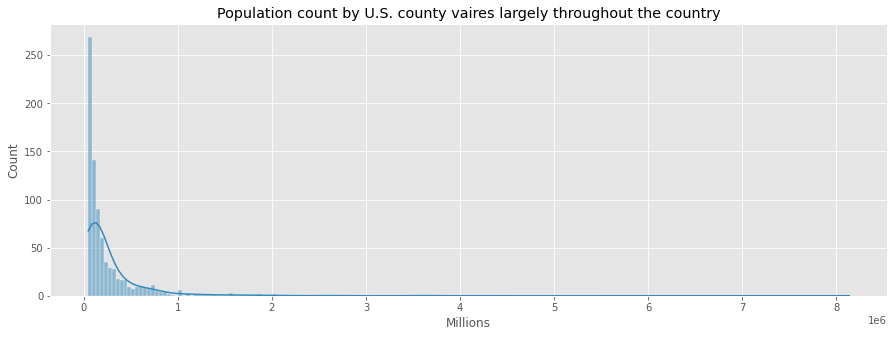

In [31]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_pop_data,
             x="est_total_pop_16_over",
             kde=True)
plt.xlabel("Millions")
plt.title("Population count by U.S. county vaires largely throughout the country");

The data is severly skewed to the right. This column needs to be normulaized so that the numbers are easier to interpret since there we are wokring with population counts in the millions. 

In [ ]:
#NOTE: INSERT A DENSITY OR HEAT MAP TO SHOW TO POPULATION ACROSS THE COUNTRY AND TERRITORIES

##### Employment Rate 

In [10]:
overall_pop_data[["est_emp_pop_ratio_16_over","mar_emp_pop_ratio_16_over"]].describe()

,est_emp_pop_ratio_16_over,mar_emp_pop_ratio_16_over
count,815.000000,815.000000
mean,59.083436,2.129571
std,6.508625,0.856223
min,31.500000,0.200000
25%,55.250000,1.500000
50%,59.600000,2.100000
75%,63.400000,2.700000
max,75.800000,4.600000


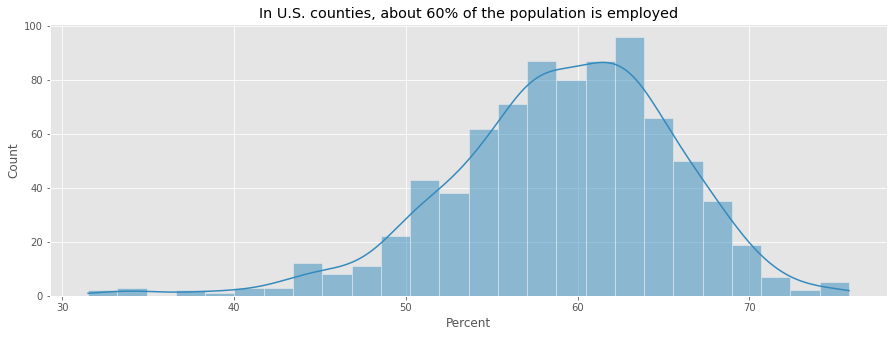

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_pop_data,
             x="est_emp_pop_ratio_16_over",
             kde=True)
plt.xlabel("Percent")
plt.title("In U.S. counties, about 60% of the population is employed");

The employment rate by county is relatively normally distributed. There is a slight skew ot the left. When we pull the multiple variables acorss datasets, it will be great run some correlation between employment rates and internet/technology access. 

##### Unemployment Rate 

In [12]:
overall_pop_data[["est_unemp_pop_ratio_16_over","mar_unemp_pop_ratio_16_over"]].describe()

,est_unemp_pop_ratio_16_over,mar_unemp_pop_ratio_16_over
count,815.000000,815.000000
mean,4.640982,1.357791
std,2.033217,0.725177
min,1.000000,0.200000
25%,3.400000,0.800000
50%,4.300000,1.200000
75%,5.500000,1.700000
max,23.800000,5.800000


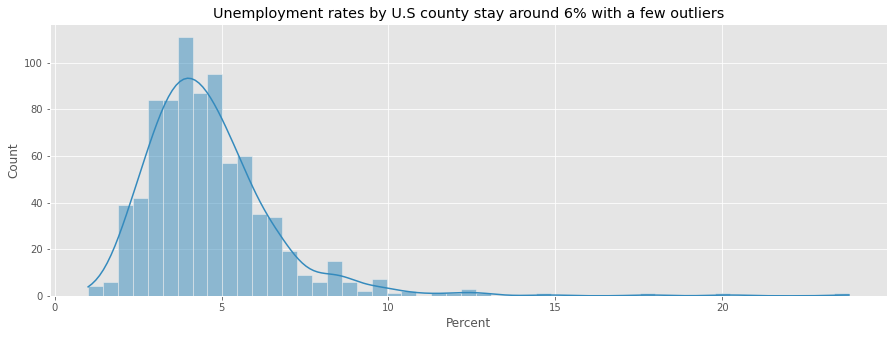

In [29]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_pop_data,
             x="est_unemp_pop_ratio_16_over",
             kde=True)
plt.xlabel("Percent")
plt.title("Unemployment rates by U.S county stay around 6% with a few outliers");

The unemployment rate on a county level seems to be right skewed. The rates are relatively low - most data being between 1 - 5%. Similiarly, to the employment rate, it would be interesting to see how much this differs on the state level and how to this relates (if at all) to internet accessibility.

## Income Data

In [16]:
with open('clean_income_data.csv') as f:
    raw_clean_income =  pd.read_csv(f, delimiter=',')
    
raw_clean_income

,GEO_ID,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,S1901_C01_005E,...,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,county,state
0,0500000US01003,82325,3231,4.9,1.6,3.9,1.4,9.4,2.0,10.4,...,48871.0,5729.0,(X),(X),(X),(X),30.1,(X),Baldwin County,Alabama
1,0500000US01015,44636,2010,9.6,3.1,7.3,2.4,8.4,2.0,13.1,...,32609.0,4229.0,(X),(X),(X),(X),35.7,(X),Calhoun County,Alabama
2,0500000US01043,32090,1233,4.4,1.5,5.4,2.2,11.0,2.8,13.2,...,28508.0,2622.0,(X),(X),(X),(X),37.1,(X),Cullman County,Alabama
3,0500000US01049,24880,1347,7.2,2.8,8.4,3.8,15.6,3.5,7.6,...,36416.0,10258.0,(X),(X),(X),(X),36.0,(X),DeKalb County,Alabama
4,0500000US01051,30712,1330,2.9,1.4,1.9,1.3,13.2,4.1,10.8,...,50153.0,12317.0,(X),(X),(X),(X),39.1,(X),Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0500000US72113,52837,1952,36.3,2.5,13.5,2.1,16.0,2.5,9.9,...,18260.0,2810.0,(X),(X),(X),(X),34.6,(X),Ponce Municipio,Puerto Rico
836,0500000US72127,138800,3232,29.1,1.6,8.8,1.3,14.8,1.5,10.2,...,27875.0,2579.0,(X),(X),(X),(X),34.6,(X),San Juan Municipio,Puerto Rico
837,0500000US72135,22650,1148,20.1,4.5,8.2,3.1,16.8,4.6,12.8,...,21261.0,7449.0,(X),(X),(X),(X),67.3,(X),Toa Alta Municipio,Puerto Rico
838,0500000US72137,28291,1322,22.3,4.0,10.1,2.9,19.9,3.4,13.8,...,22178.0,2792.0,(X),(X),(X),(X),21.5,(X),Toa Baja Municipio,Puerto Rico


### Overall Income Breakouts

This dataset provides information on the overall estimate and margin of error of income by household type (i.e., household, families, married couple families, and non-family). Within each of these household types there are 10 income breakouts with estimated percentages of the proportion of families that fall within the specified bracket. 

For this first past of an exploration, we are going to look at general households and families since our questions wants to address the general population, but even more so vulnerable populations, such as children. 

##### Number of households overall

"S1901_C01_001E","Estimate!!Households!!Total"

"S1901_C01_001M","Margin of Error!!Households!!Total"

##### Median income for households

"S1901_C01_012E","Estimate!!Households!!Median income (dollars)"

"S1901_C01_012M","Margin of Error!!Households!!Median income (dollars)"

##### Number of families

"S1901_C02_001E","Estimate!!Families!!Total"

"S1901_C02_001M","Margin of Error!!Families!!Total"

##### Median income for families 

"S1901_C02_012E","Estimate!!Families!!Median income (dollars)"

"S1901_C02_012M","Margin of Error!!Families!!Median income (dollars)"

In [17]:
### Selecting overall income vars

overall_income_data = raw_clean_income[["GEO_ID", "county", "state", "S1901_C01_001E", "S1901_C01_001M", "S1901_C01_012E", "S1901_C01_012M", "S1901_C02_001E", "S1901_C02_001M", "S1901_C02_012E","S1901_C02_012M"]]

overall_income_dict = {"S1901_C01_001E":"est_total_households",
               "S1901_C01_001M":"mar_total_households",
               "S1901_C01_012E":"est_med_income_households",
               "S1901_C01_012M":"mar_med_income_households",
               "S1901_C02_001E":"est_total_families",
               "S1901_C02_001M":"mar_total_families",
                "S1901_C02_012E":"est_med_income_families",
               "S1901_C02_012M":"mar_med_income_families"
                          }

overall_income_data.rename(columns=overall_income_dict, inplace=True)

overall_income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GEO_ID                     840 non-null    object
 1   county                     840 non-null    object
 2   state                      840 non-null    object
 3   est_total_households       840 non-null    int64 
 4   mar_total_households       840 non-null    int64 
 5   est_med_income_households  840 non-null    int64 
 6   mar_med_income_households  840 non-null    int64 
 7   est_total_families         840 non-null    int64 
 8   mar_total_families         840 non-null    int64 
 9   est_med_income_families    840 non-null    int64 
 10  mar_med_income_families    840 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 72.3+ KB


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [34]:
overall_income_data

,GEO_ID,county,state,est_total_households,mar_total_households,est_med_income_households,mar_med_income_households,est_total_families,mar_total_families,est_med_income_families,mar_med_income_families
0,0500000US01003,Baldwin County,Alabama,82325,3231,56439,6268,53962,3415,76892,7776
1,0500000US01015,Calhoun County,Alabama,44636,2010,48156,4922,28975,2198,61918,3560
2,0500000US01043,Cullman County,Alabama,32090,1233,50906,3480,23212,1335,60886,3502
3,0500000US01049,DeKalb County,Alabama,24880,1347,44208,5702,16366,1614,54871,7736
4,0500000US01051,Elmore County,Alabama,30712,1330,61854,5816,21146,1709,76574,9027
...,...,...,...,...,...,...,...,...,...,...,...
835,0500000US72113,Ponce Municipio,Puerto Rico,52837,1952,15130,1328,33988,2052,18823,2263
836,0500000US72127,San Juan Municipio,Puerto Rico,138800,3232,23005,1448,77911,3408,29661,2461
837,0500000US72135,Toa Alta Municipio,Puerto Rico,22650,1148,28440,4985,16964,1517,36422,6263
838,0500000US72137,Toa Baja Municipio,Puerto Rico,28291,1322,23368,2771,18388,1277,26195,4531


#### Count of overall households

In [32]:
overall_income_data[["est_total_households", "mar_total_households"]].describe()

,est_total_households,mar_total_households
count,8.400000e+02,840.000000
mean,1.242086e+05,2032.228571
std,2.063280e+05,1174.729436
min,2.076100e+04,520.000000
25%,3.663400e+04,1323.000000
50%,6.043850e+04,1693.500000
75%,1.283092e+05,2395.500000
max,3.328398e+06,10077.000000


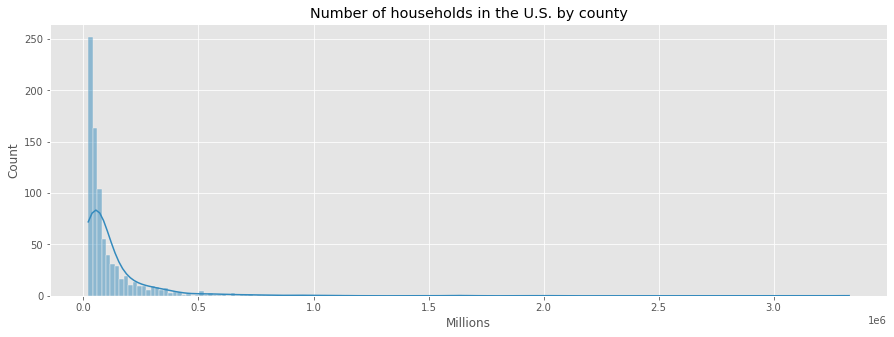

In [45]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_income_data,
             x="est_total_households",
             kde=True)
plt.xlabel("Millions")
plt.title("Number of households in the U.S. by county");

#### Median income by overall household

In [41]:
overall_income_data[["est_med_income_households", "mar_med_income_households"]].describe()

overall_income_data["mod_est_med_income_households"] = overall_income_data["est_med_income_households"]*.001
overall_income_data["mod_mar_med_income_households"] = overall_income_data["mar_med_income_households"]*.001

overall_income_data[["mod_est_med_income_households", "mod_mar_med_income_households"]].describe()

<ipython-input-41-1f6e9d6bbd4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_income_data["mod_est_med_income_households"] = overall_income_data["est_med_income_households"]*.001
<ipython-input-41-1f6e9d6bbd4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_income_data["mod_mar_med_income_households"] = overall_income_data["mar_med_income_households"]*.001


,mod_est_med_income_households,mod_mar_med_income_households
count,840.000000,840.000000
mean,64.960261,4.303555
std,17.717762,1.920514
min,14.525000,0.741000
25%,53.057500,2.951000
50%,61.299000,3.981500
75%,72.802500,5.387750
max,151.800000,14.278000


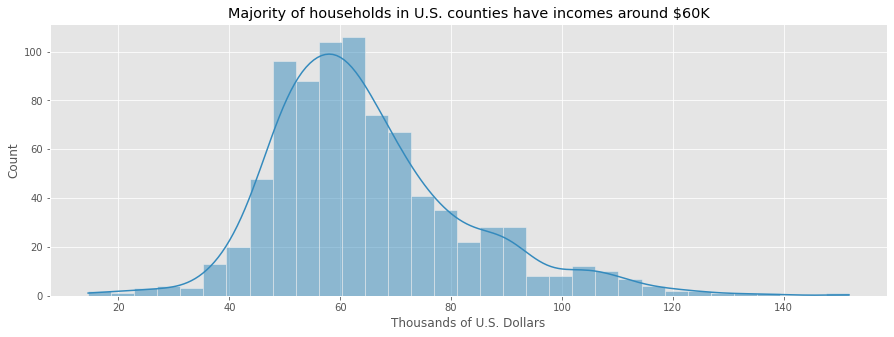

In [44]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_income_data,
             x="mod_est_med_income_households",
             kde=True)
plt.xlabel("Thousands of U.S. Dollars")
plt.title("Majority of households in U.S. counties have incomes around $60K"); 

#### Overall families count

In [48]:
overall_income_data[["est_total_families", "mar_total_families"]].describe()

,est_total_families,mar_total_families
count,8.400000e+02,840.000000
mean,8.028284e+04,2704.979762
std,1.334346e+05,1583.728928
min,1.152500e+04,884.000000
25%,2.425225e+04,1673.000000
50%,3.966650e+04,2223.500000
75%,8.218550e+04,3202.500000
max,2.204715e+06,13918.000000


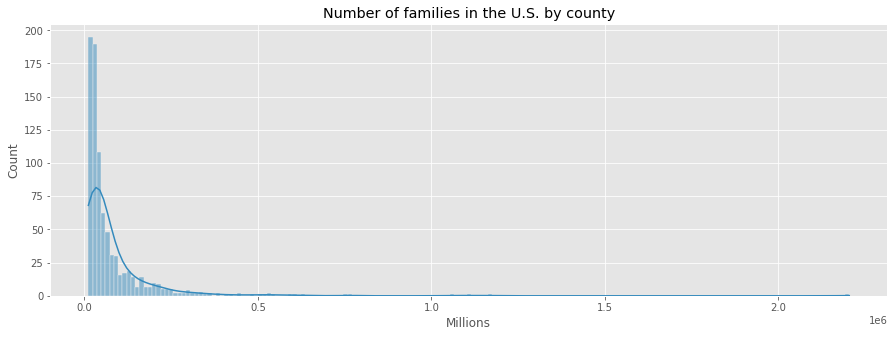

In [49]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_income_data,
             x="est_total_families",
             kde=True)
plt.xlabel("Millions")
plt.title("Number of families in the U.S. by county");

In [50]:
overall_income_data[["est_med_income_families", "mar_med_income_families"]].describe()

overall_income_data["mod_est_med_income_families"] = overall_income_data["est_med_income_families"]*.001
overall_income_data["mod_mar_med_income_families"] = overall_income_data["mar_med_income_families"]*.001

overall_income_data[["mod_est_med_income_families", "mod_mar_med_income_families"]].describe()

<ipython-input-50-3eedd5054291>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_income_data["mod_est_med_income_families"] = overall_income_data["est_med_income_families"]*.001
<ipython-input-50-3eedd5054291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_income_data["mod_mar_med_income_families"] = overall_income_data["mar_med_income_families"]*.001


,mod_est_med_income_families,mod_mar_med_income_families
count,840.000000,840.000000
mean,80.214995,5.796758
std,20.710096,2.706392
min,18.823000,0.759000
25%,66.524750,3.839750
50%,76.866000,5.296000
75%,90.743500,7.257750
max,169.887000,17.868000


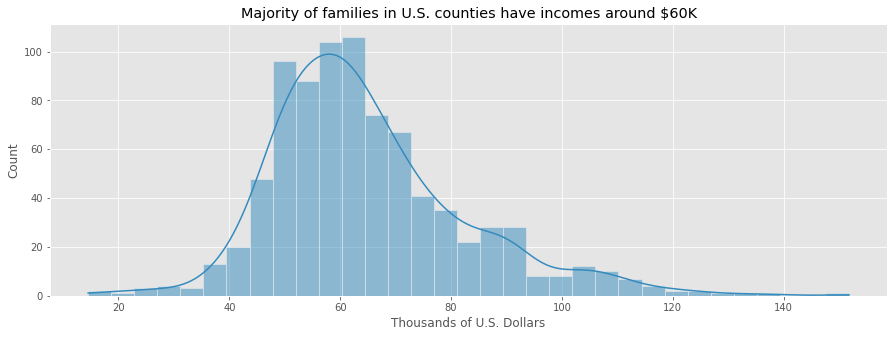

In [51]:
plt.figure(figsize=(15, 5))
sns.histplot(data=overall_income_data,
             x="mod_est_med_income_households",
             kde=True)
plt.xlabel("Thousands of U.S. Dollars")
plt.title("Majority of families in U.S. counties have incomes around $60K"); 